# Serial founder events from _urban_ to _rural_, migration and selection

In these simulations, we reverse the drfit gradient and the rural is serially colonized from the urban environment.  These simulations sought to test the balance between drift and selection in forming clines. We performed simulations under 3 migration rates: 0, 0.01, 0.05. Simulations included 10 selection coefficients: 0; 0.001; 0.0025; 0.005; 0.0075; 0.01; 0.025; 0.05; 0.1; 0.2. We chose 3 founder proportion: 0.01; 0.2; 1.0. The parameter combinations were as follows (all varied parameters crossed factorially, total simulations = 90): 

* Number of simulations: 1000
* Number of generations: 500
* Max Creation probability: 1.0
* Bottleneck proportion: [0.01; 0.2; 1.0]
* pA and pB: 0.5 and 0.5
* Migration rate: [0; 0.01; 0.05]
* Maximum _K_ (urban): 1000
* Minimum _K_ (rural): 1000
* Maximum selection coefficient: 0; 0.001; 0.0025; 0.005; 0.0075; 0.01; 0.025; 0.05; 0.1; 0.2

In [1]:
library(plyr)
library(ggplot2)
library(data.table)
library(Rmisc)
library(dplyr)

Loading required package: lattice

Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#Themes used for plotting
ng1=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

ng1.45=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15,angle=45,hjust=1),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

In [3]:
#Working directory for datasets varying migration rate and bottleneck proportion 
setwd('~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Data/summary-datasets/oneFill_Bottlenecks_U-R_Selection')

#Load datasets that will be used for analyses
MeansProps <- fread('20180109_MeansProps_oneFill_Bottlenecks_AlleleFreq.csv', header = T)
MeansProps$max_s = as.factor(as.character(MeansProps$max_s))
MeansProps$Mig_rate = as.factor(as.character(MeansProps$Mig_rate))
MeansProps$bot = as.factor(as.character(MeansProps$bot))

In [4]:
# Data subsets
MeansProps_GenOne_StrongBot <- subset(MeansProps, seq == "1" & bot == "0.01")
MeansProps_GenOne_Interbot <- subset(MeansProps, seq == "1" & bot == "0.2")
MeansProps_GenOne_NoBot <- subset(MeansProps, seq == "1" & bot == "1")
MeansProps_GenOne_NoMig <- subset(MeansProps, seq == "1" & Mig_rate == "0")

In [18]:
MeansProps_GenOne_StrongBot[,c(1, 2, 3, 10, 16)]

bot,Mig_rate,max_s,prop_sigPos,prop_sigNeg
0.01,0,0,0.179,0.456
0.01,0,0.001,0.178,0.381
0.01,0,0.0025,0.189,0.339
0.01,0,0.005,0.205,0.237
0.01,0,0.0075,0.241,0.177
0.01,0,0.01,0.230,0.132
0.01,0,0.025,0.213,0.007
0.01,0,0.05,0.193,0.000
0.01,0,0.1,0.175,0.000
0.01,0,0.2,0.086,0.000


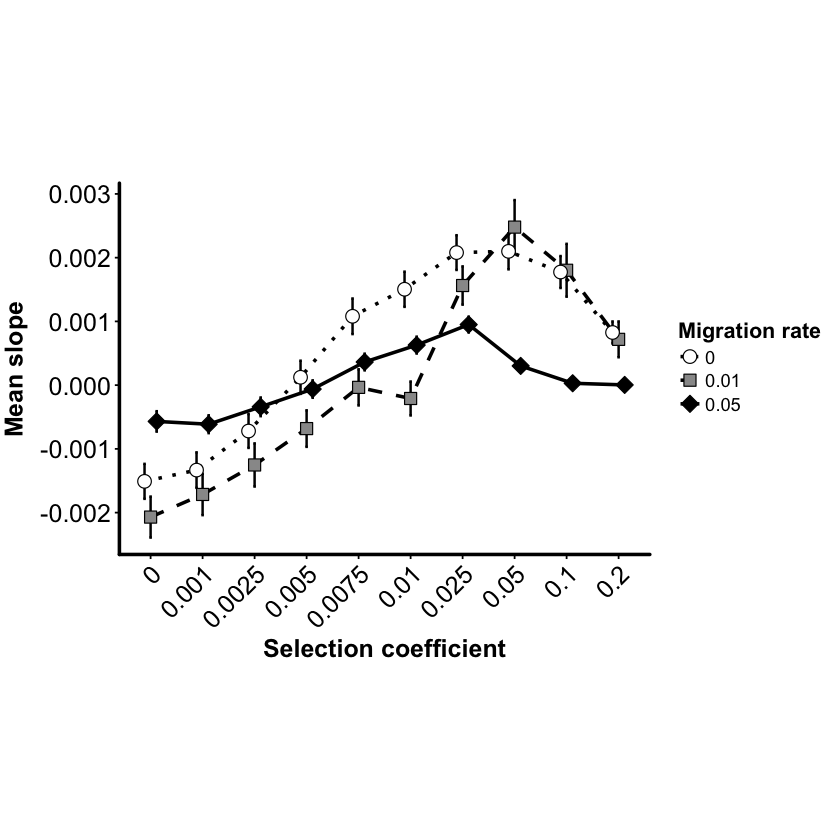

In [19]:
MeanSlope_StrongBot <- ggplot(MeansProps_GenOne_StrongBot, aes(x = max_s, y = mean, group = Mig_rate)) + 
    geom_errorbar(aes(ymin = mean - ci_mean, ymax = mean + ci_mean), width=0.15, size=0.7,
    position = position_dodge(width = 0.35)) +
    geom_line(size = 1, aes(linetype = Mig_rate), position = position_dodge(width = 0.35)) +
    geom_point(size = 3.5, aes(fill = Mig_rate, shape = Mig_rate), position = position_dodge(width = 0.35)) + 
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
#     coord_cartesian(ylim = c(0, 0.0067)) + scale_y_continuous(breaks = seq(from = 0, to = 0.006, by = 0.002)) +
    ylab("Mean slope") + xlab("Selection coefficient") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_StrongBot

In [1]:
MeanSlope_InterBot <- ggplot(MeansProps_GenOne_Interbot, aes(x = max_s, y = mean, group = Mig_rate)) + 
    geom_errorbar(aes(ymin = mean - ci_mean, ymax = mean + ci_mean), width=0.15, size=0.7,
    position = position_dodge(width = 0.35)) +
    geom_line(size = 1, aes(linetype = Mig_rate), position = position_dodge(width = 0.35)) +
    geom_point(size = 3.5, aes(fill = Mig_rate, shape = Mig_rate), position = position_dodge(width = 0.35)) + 
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    coord_cartesian(ylim = c(-0.007, 0.006)) + scale_y_continuous(breaks = seq(from = -0.007, to = 0.006, by = 0.002)) +
    ylab("Mean slope") + xlab("Selection coefficient") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_InterBot

ERROR: Error in ggplot(MeansProps_GenOne_Interbot, aes(x = max_s, y = abs(mean), : could not find function "ggplot"


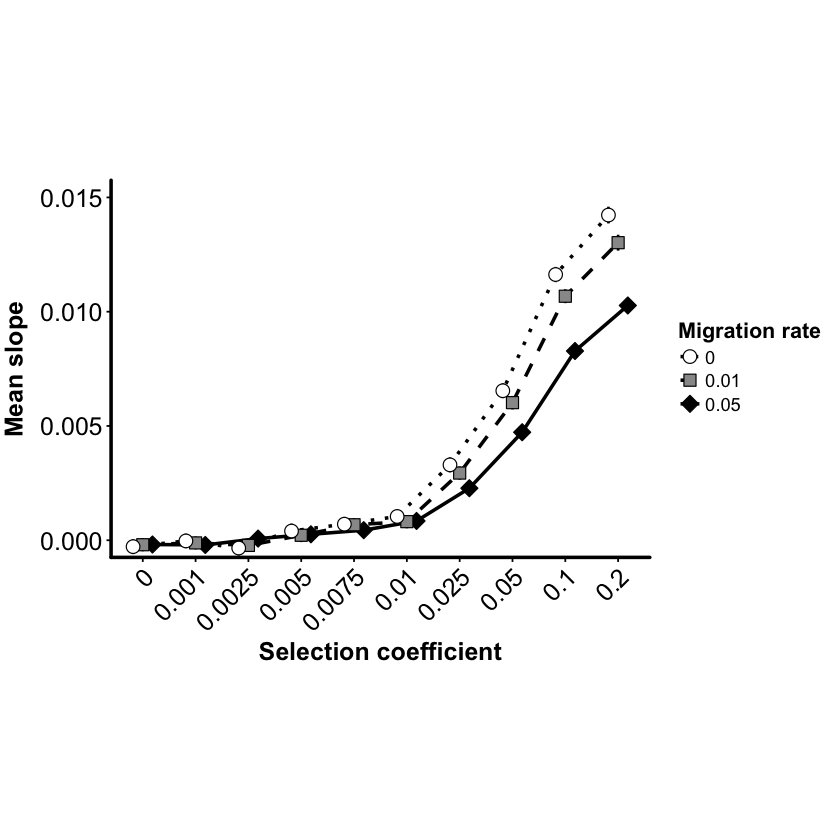

In [21]:
MeanSlope_NoBot <- ggplot(MeansProps_GenOne_NoBot, aes(x = max_s, y = mean, group = Mig_rate)) + 
    geom_errorbar(aes(ymin = mean - ci_mean, ymax = mean + ci_mean), width=0.15, size=0.7,
    position = position_dodge(width = 0.55)) +
    geom_line(size = 1, aes(linetype = Mig_rate), position = position_dodge(width = 0.55)) +
    geom_point(size = 3.5, aes(fill = Mig_rate, shape = Mig_rate), position = position_dodge(width = 0.55)) + 
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    coord_cartesian(ylim = c(0, 0.015)) + scale_y_continuous(breaks = seq(from = 0, to = 0.015, by = 0.005)) +
    ylab("Mean slope") + xlab("Selection coefficient") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_NoBot

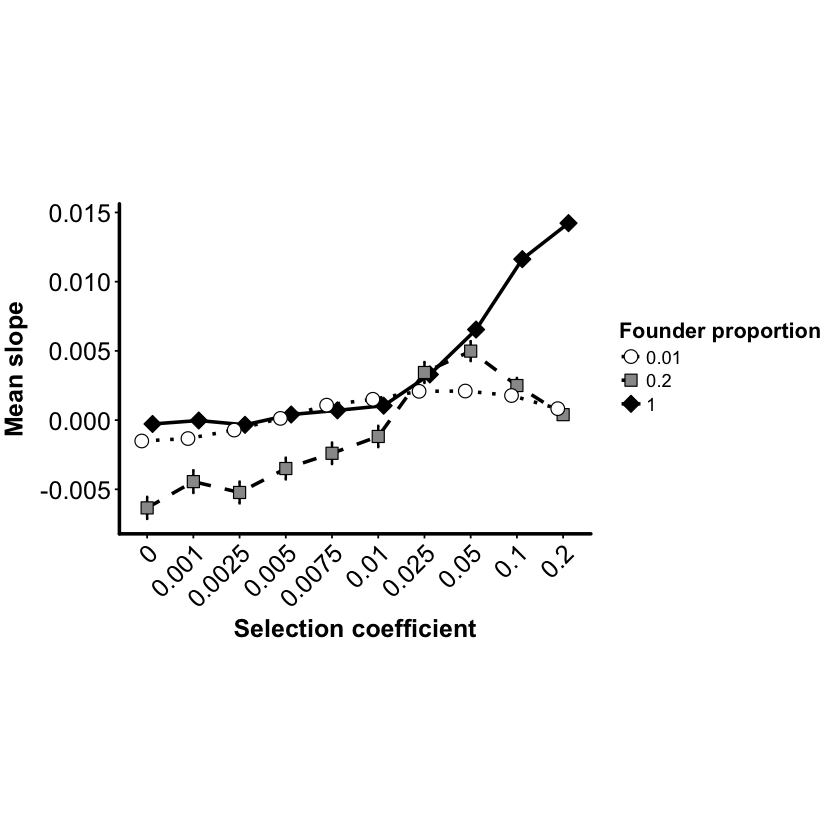

In [32]:
MeanSlope_NoMig <- ggplot(MeansProps_GenOne_NoMig, aes(x = max_s, y = mean, group = bot)) + 
    geom_errorbar(aes(ymin = mean - ci_mean, ymax = mean + ci_mean), width=0.15, size=0.7,
    position = position_dodge(width = 0.35)) +
    geom_line(size = 1, aes(linetype = bot), position = position_dodge(width = 0.35)) +
    geom_point(size = 3.5, aes(fill = bot, shape = bot), position = position_dodge(width = 0.35)) + 
    scale_shape_manual(labels = c("0.01", "0.2", "1"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0.01", "0.2", "1"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0.01", "0.2", "1"), values = c("dotted", "dashed", "solid")) +  
#     coord_cartesian(ylim = c(0, 0.0067)) + scale_y_continuous(breaks = seq(from = 0, to = 0.006, by = 0.002)) +
    ylab("Mean slope") + xlab("Selection coefficient") + 
    labs(fill = "Founder proportion", shape = "Founder proportion", linetype = "Founder proportion") + ng1.45
MeanSlope_NoMig

In [22]:
#Extra columns that will be used to create melting dataset for plotting proportion of positive and negative slopes
SlopeSum_Melt_NoMig <- dplyr::select(MeansProps_GenOne_NoMig, max_s, bot, prop_sigPos, ci_sigPos, prop_sigNeg,
  ci_sigNeg)

#Melt dataframe
dm1 <- melt(MeansProps_GenOne_NoMig[,c("bot", "prop_sigPos", "ci_sigPos", "max_s")], 
            id=c("bot", "ci_sigPos", "max_s"))
dm2 <- melt(MeansProps_GenOne_NoMig[,c("bot", "prop_sigNeg", "ci_sigNeg", "max_s")], 
            id=c("bot", "ci_sigNeg", "max_s"))

#Rename columns
setnames(dm1, old = "ci_sigPos", new = "ci")
setnames(dm2, old = "ci_sigNeg", new = "ci")

#Merge melted dataframes
SlopeSum_Melt_NoMig <- rbind(dm1, dm2)
SlopeSum_Melt_NoMig

bot,ci,max_s,variable,value
0.01,0.023760423,0,prop_sigPos,0.179
0.01,0.023708386,0.001,prop_sigPos,0.178
0.01,0.024265956,0.0025,prop_sigPos,0.189
0.01,0.025021686,0.005,prop_sigPos,0.205
0.01,0.026508520,0.0075,prop_sigPos,0.241
0.01,0.026083469,0.01,prop_sigPos,0.230
0.01,0.025376589,0.025,prop_sigPos,0.213
0.01,0.024460847,0.05,prop_sigPos,0.193
0.01,0.023550605,0.1,prop_sigPos,0.175
0.01,0.017377144,0.2,prop_sigPos,0.086


In [6]:
# Data subsets
SlopeSum_Melt_NoMig_StrongBot <- subset(SlopeSum_Melt_NoMig, bot == "0.01")
SlopeSum_Melt_NoMig_InterBot <- subset(SlopeSum_Melt_NoMig, bot == "0.2")
SlopeSum_Melt_NoMig_NoBot <- subset(SlopeSum_Melt_NoMig, bot == "1")
SlopeSum_Melt_NoMig_Bot_Pos <- subset(SlopeSum_Melt_NoMig, variable == "prop_sigPos")
SlopeSum_Melt_NoMig_Bot_Neg <- subset(SlopeSum_Melt_NoMig, variable == "prop_sigNeg")

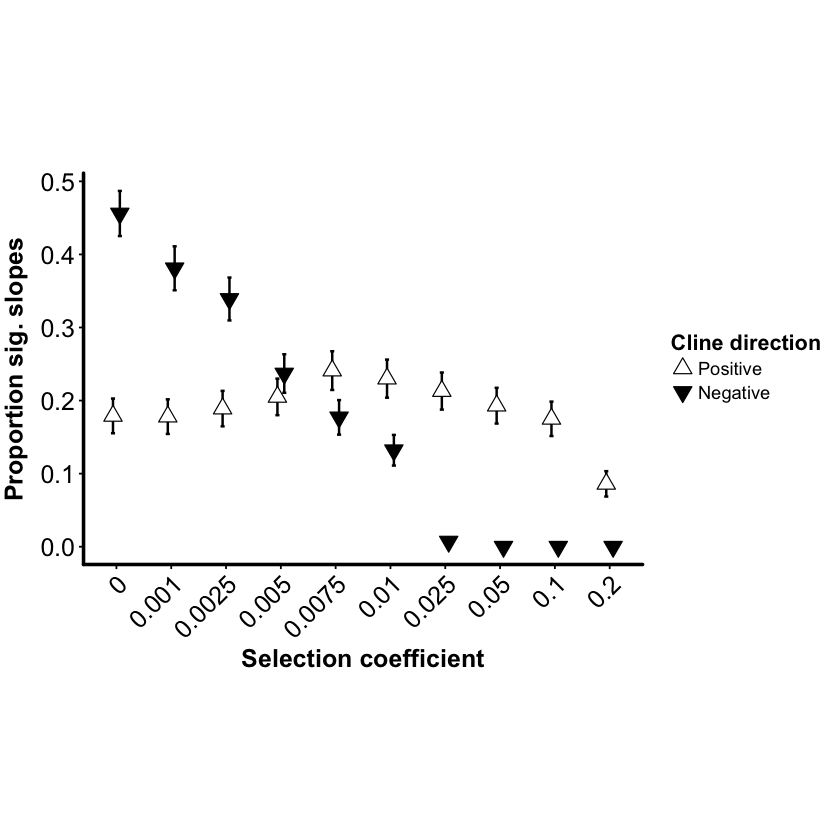

In [23]:
#Plot proportion of significant slopes by migration rate
PropSig_StrongBot_NoMig <- ggplot(SlopeSum_Melt_NoMig_StrongBot, aes(x = factor(max_s), y = value, 
    shape = variable, fill = variable)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size = 0.7, 
    position = position_dodge(width = 0.25)) +
    ylab("Proportion sig. slopes") + xlab("Selection coefficient") + geom_point(size = 3.5, color = "black", 
    position = position_dodge(width = 0.25)) +
    scale_shape_manual(labels = c("Positive", "Negative"),values=c(24, 25))+
    scale_fill_manual(labels = c("Positive", "Negative"),values=c("white", "black")) +
    scale_y_continuous(breaks = seq(from = 0, to = 1.0, by = 0.10)) +
    labs(shape = 'Cline direction', fill = 'Cline direction') + ng1.45
PropSig_StrongBot_NoMig

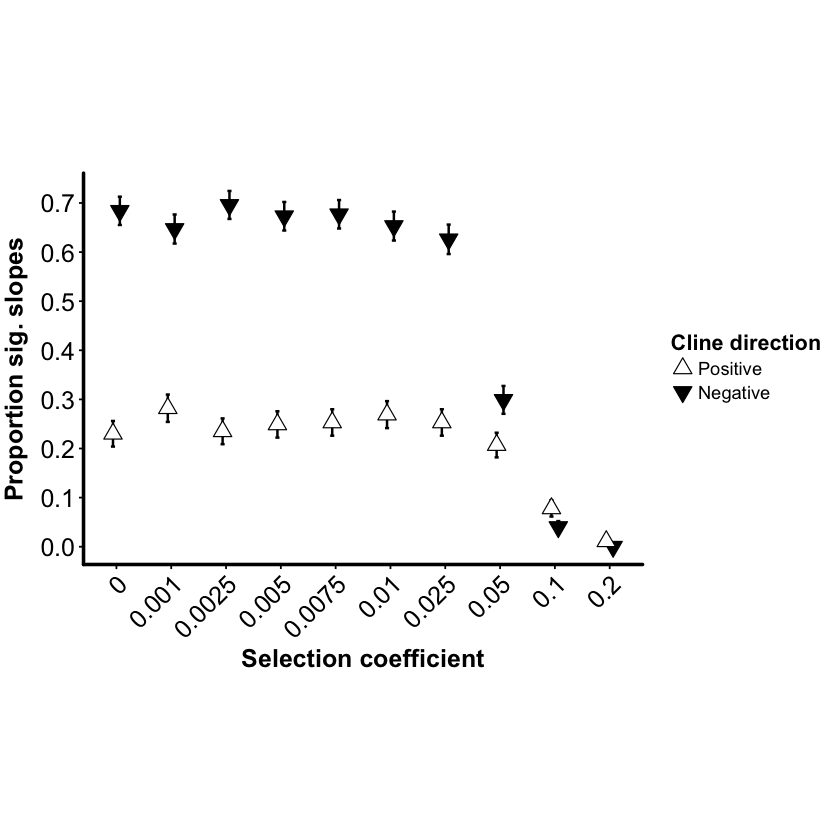

In [24]:
#Plot proportion of significant slopes by migration rate
PropSig_InterBot_NoMig <- ggplot(SlopeSum_Melt_NoMig_InterBot, aes(x = factor(max_s), y = value, 
    shape = variable, fill = variable)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size = 0.7, 
    position = position_dodge(width = 0.25)) +
    ylab("Proportion sig. slopes") + xlab("Selection coefficient") + geom_point(size = 3.5, color = "black", 
    position = position_dodge(width = 0.25)) +
    scale_shape_manual(labels = c("Positive", "Negative"),values=c(24, 25))+
    scale_fill_manual(labels = c("Positive", "Negative"),values=c("white", "black")) +
    scale_y_continuous(breaks = seq(from = 0, to = 1.0, by = 0.10)) +
    labs(shape = 'Cline direction', fill = 'Cline direction') + ng1.45
PropSig_InterBot_NoMig

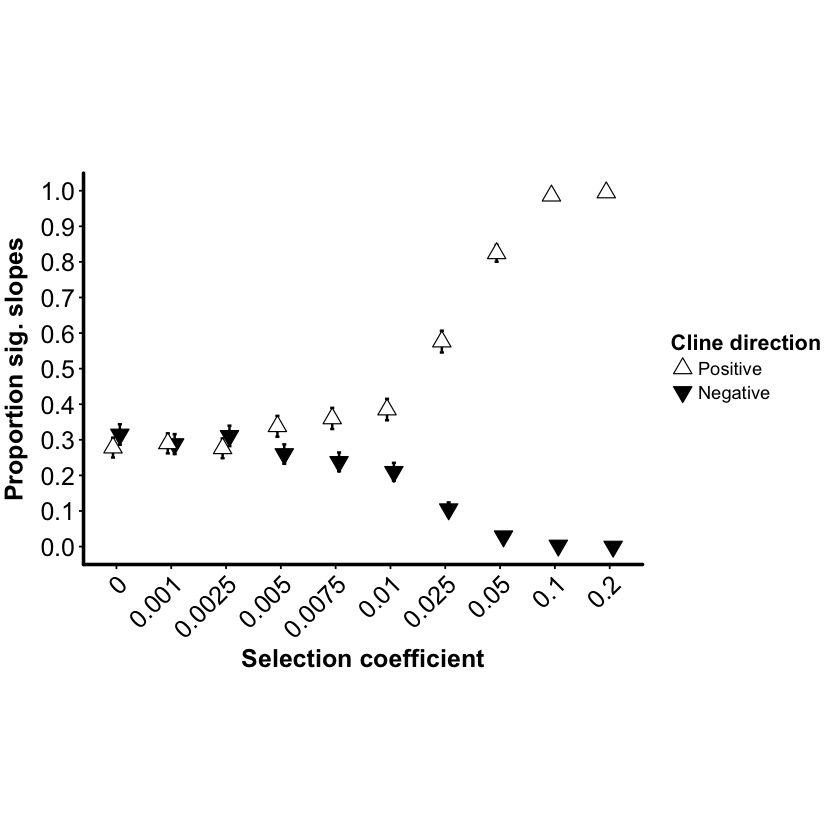

In [25]:
#Plot proportion of significant slopes by migration rate
PropSig_NoBot_NoMig <- ggplot(SlopeSum_Melt_NoMig_NoBot, aes(x = factor(max_s), y = value, 
    shape = variable, fill = variable)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size = 0.7, 
    position = position_dodge(width = 0.25)) +
    ylab("Proportion sig. slopes") + xlab("Selection coefficient") + geom_point(size = 3.5, color = "black", 
    position = position_dodge(width = 0.25)) +
    scale_shape_manual(labels = c("Positive", "Negative"),values=c(24, 25))+
    scale_fill_manual(labels = c("Positive", "Negative"),values=c("white", "black")) +
    scale_y_continuous(breaks = seq(from = 0, to = 1.0, by = 0.10)) +
    labs(shape = 'Cline direction', fill = 'Cline direction') + ng1.45
PropSig_NoBot_NoMig

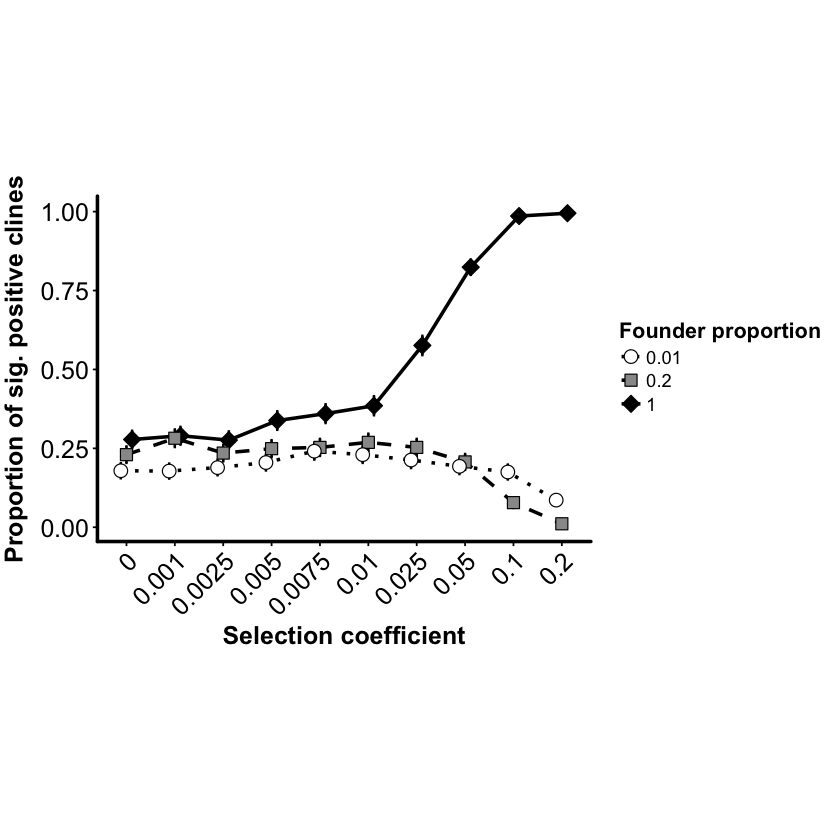

In [8]:
#Plot proportion of significant slopes by migration rate
PropSigPos_Bot_NoMig <- ggplot(SlopeSum_Melt_NoMig_Bot_Pos, aes(x = max_s, y = value, group = bot)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size=0.7,
    position = position_dodge(width = 0.35)) +
    geom_line(size = 1, aes(linetype = bot), position = position_dodge(width = 0.35)) +
    geom_point(size = 3.5, aes(fill = bot, shape = bot), position = position_dodge(width = 0.35)) + 
    scale_shape_manual(labels = c("0.01", "0.2", "1"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0.01", "0.2", "1"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0.01", "0.2", "1"), values = c("dotted", "dashed", "solid")) +  
#     coord_cartesian(ylim = c(0, 0.0067)) + scale_y_continuous(breaks = seq(from = 0, to = 0.006, by = 0.002)) +
    ylab("Proportion of sig. positive clines") + xlab("Selection coefficient") + 
    labs(fill = "Founder proportion", shape = "Founder proportion", linetype = "Founder proportion") + ng1.45
PropSigPos_Bot_NoMig

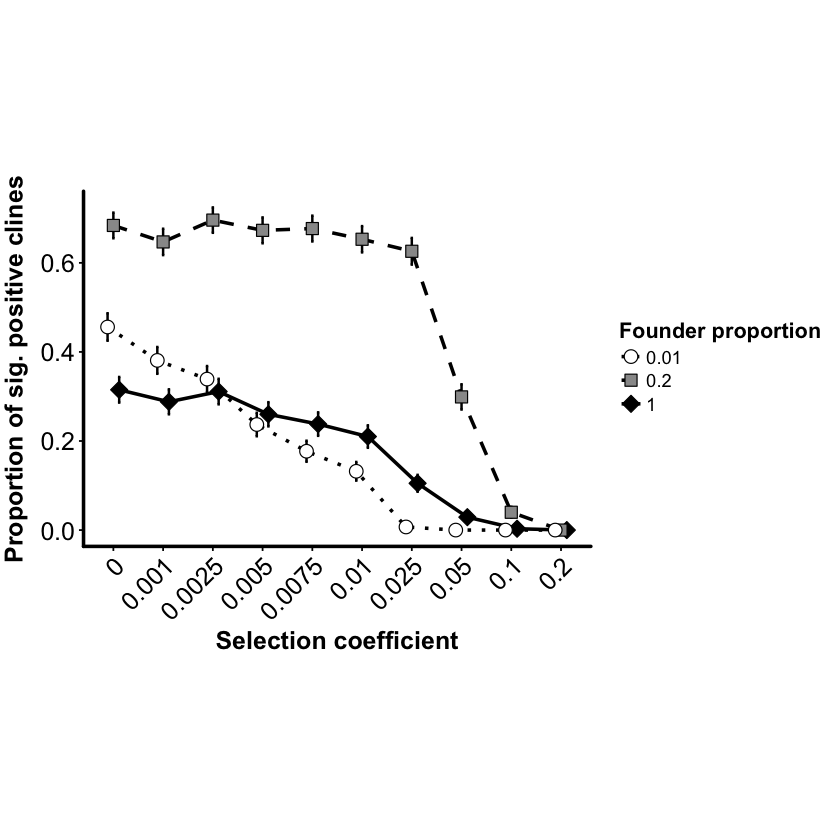

In [9]:
PropSigNeg_Bot_NoMig <- ggplot(SlopeSum_Melt_NoMig_Bot_Neg, aes(x = max_s, y = value, group = bot)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size=0.7,
    position = position_dodge(width = 0.35)) +
    geom_line(size = 1, aes(linetype = bot), position = position_dodge(width = 0.35)) +
    geom_point(size = 3.5, aes(fill = bot, shape = bot), position = position_dodge(width = 0.35)) + 
    scale_shape_manual(labels = c("0.01", "0.2", "1"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0.01", "0.2", "1"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0.01", "0.2", "1"), values = c("dotted", "dashed", "solid")) +  
#     coord_cartesian(ylim = c(0, 0.0067)) + scale_y_continuous(breaks = seq(from = 0, to = 0.006, by = 0.002)) +
    ylab("Proportion of sig. positive clines") + xlab("Selection coefficient") + 
    labs(fill = "Founder proportion", shape = "Founder proportion", linetype = "Founder proportion") + ng1.45
PropSigNeg_Bot_NoMig

In [26]:
path = "~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Git/SEC_Figures"

MeanSlope_StrongBot_NoLeg = MeanSlope_StrongBot + theme(legend.position="none")
MeanSlope_InterBot_NoLeg = MeanSlope_InterBot + theme(legend.position="none")
MeanSlope_NoBot_NoLeg = MeanSlope_NoBot + theme(legend.position="none")
PropSig_StrongBot_NoMig_NoLeg = PropSig_StrongBot_NoMig + theme(legend.position="none")
PropSig_InterBot_NoMig_NoLeg = PropSig_InterBot_NoMig + theme(legend.position="none")
PropSig_NoBot_NoMig_NoLeg = PropSig_NoBot_NoMig + theme(legend.position="none")

ggsave("Figure-S3C_MeanSlope_StrongBot_NoLeg.pdf", plot = MeanSlope_StrongBot_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S3B_MeanSlope_InterBot_NoLeg.pdf", plot = MeanSlope_InterBot_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S3A_MeanSlope_NoBot_NoLeg.pdf", plot = MeanSlope_NoBot_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S3F_PropSig_StrongBot_NoMig_NoLeg.pdf", plot = PropSig_StrongBot_NoMig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S3E_PropSig_InterBot_NoMig_NoLeg.pdf", plot = PropSig_InterBot_NoMig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("Figure-S3D_PropSig_NoBot_NoMig_NoLeg.pdf", plot = PropSig_NoBot_NoMig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
